## 2C - L1 Fourier Transform

reference: https://realpython.com/python-scipy-fft/

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Generating Signal

In [2]:
SAMPLE_RATE = 44100  # No. of data points to sample in one second
DURATION = 5  # Seconds

In [8]:
def generate_sine_wave(freq, power, sample_rate, duration):
    '''
    Generate a sine wave of given frequency and power that
    contains sample_rate number of data points per second
    '''
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    y = power * np.sin((2 * np.pi) * frequencies)
    return x, y

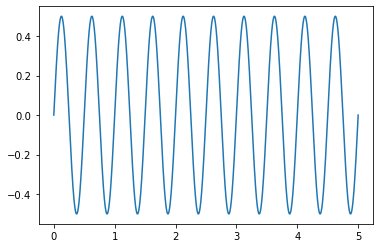

In [12]:
x, y = generate_sine_wave(2, 0.5, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

### Mixing Signals

In [13]:
_, nice_tone = generate_sine_wave(400, 1, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, 0.3, SAMPLE_RATE, DURATION)

In [14]:
mixed_tone = nice_tone + noise_tone

#### Normalize the Signal

Normalize the signal so that it falls between -32767 and 32767

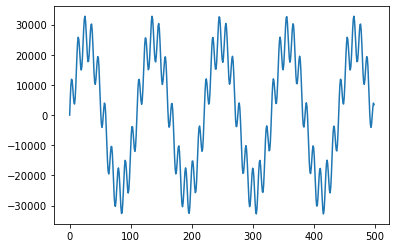

In [16]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:500])
plt.show()

### Saving the frequency

In [17]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("data/mysinewave.wav", SAMPLE_RATE, normalized_tone)

### Fourier Transform

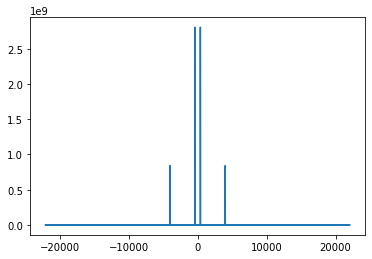

In [18]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

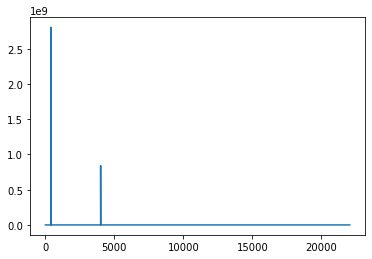

In [24]:
from scipy.fft import rfft, rfftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

#### Get the target frequency and remove it

In [25]:
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Our target frequency is 4000 Hz
target_idx = int(points_per_freq * 4000)

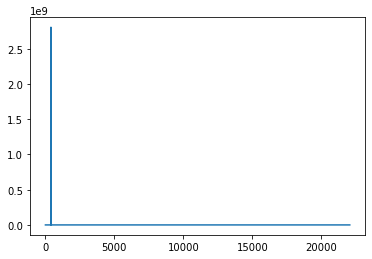

In [26]:
# set the power around target frequency to zero
yf[target_idx - 1 : target_idx + 2] = 0

plt.plot(xf, np.abs(yf))
plt.show()

### Inverse Fourier Transform

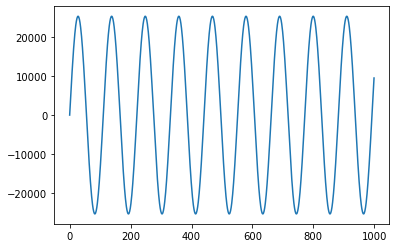

In [27]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()

In [28]:
norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))

write("data/clean.wav", SAMPLE_RATE, norm_new_sig)